<a href="https://colab.research.google.com/github/Hubertmeteor/Industrial-Copper-Modeling/blob/main/DS_Industrial_Copper_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 64.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.3 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filena

In [ ]:
pip install dataprep


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
from sklearn.preprocessing import OrdinalEncoder
import dataprep.eda.create_report as report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

# Replace 'input.xlsx' with the path to your Excel file and 'output.csv' with the desired CSV file name.
input_excel_file = 'Copper_Set.xlsx'
output_csv_file = 'output.csv'

# Load the Excel file into a pandas DataFrame
df = pd.read_excel(input_excel_file)

# Save the DataFrame to a CSV file
df.to_csv(output_csv_file, index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'Copper_Set.xlsx'

In [ ]:
df = pd.read_csv("/content/output.csv")
df

In [ ]:
# verify the number of unique values in each features
for i in list(df.columns): print(f"{i}:{df[i].nunique()}")

# id feature have all the values are unique. This feature not used for prediction. So we can drop the id column

In [ ]:
# verify datatypes of all features
df.dtypes


In [ ]:
# convert the data type from object to numeric
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['item_date_1'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['delivery date_1'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df.head(3)

In [ ]:
# check any null values in data
df.isnull().sum()

In [ ]:
# Some rubbish values are present in ‘Material_ref’ which starts with ‘00000’ value which should be converted into null
df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)
df.head(3)

In [ ]:
# check null values for all features
df.isnull().sum()

In [ ]:
# material ref have more than 55% are null values and id have all are unique values. so we have drop both columns.
df.drop(columns=['id','material_ref'], inplace=True)
df

In [ ]:
df.isnull().sum()

The resulting summary_statistics will provide insights into the distribution of numerical data in each column of your DataFrame.

In [ ]:
df.describe().T

In [ ]:
# quantity tons and selling price values are havng below 0(negative values). so we convert to null for below 0 values.
df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df.describe().T

In [ ]:
# check null values for all features
df.isnull().sum()

# Handling null values using median and mode
# median - middle value in dataset (asc/desc), mode - value that appears most frequently in dataset
# object datatype using mode


In [ ]:
df['item_date'].fillna(df['item_date'].mode().iloc[0], inplace=True)
df['item_date_1'].fillna(df['item_date_1'].mode().iloc[0], inplace=True)
df['status'].fillna(df['status'].mode().iloc[0], inplace=True)
df['delivery date'].fillna(df['delivery date'].mode().iloc[0], inplace=True)
df['delivery date_1'].fillna(df['delivery date_1'].mode().iloc[0], inplace=True)


In [ ]:
#numerical datatype using median
df['quantity tons'].fillna(df['quantity tons'].median(), inplace=True)
df['customer'].fillna(df['customer'].median(), inplace=True)
df['country'].fillna(df['country'].median(), inplace=True)
df['application'].fillna(df['application'].median(), inplace=True)
df['thickness'].fillna(df['thickness'].median(), inplace=True)
df['selling_price'].fillna(df['selling_price'].median(), inplace=True)

In [ ]:
df.isnull().sum()


In [ ]:
df['status'].unique()


In [ ]:
df['item type'].unique()

In [ ]:
# convert categorical data into numerical data - using map and ordinal encoder methods
df['status'] = df['status'].map({'Lost':0, 'Won':1, 'Draft':2, 'To be approved':3, 'Not lost for AM':4, 'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})
df['item type'] = OrdinalEncoder().fit_transform(df[['item type']])
df

In [ ]:
#array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)
df['item type'].unique()

In [ ]:
# final verification of null values after encoding
df.isnull().sum()


In [ ]:
df.describe().T


Skewness Handling - Feature Scaling (Log Transformation)

In [ ]:
# find outliers - box plot & skewed data - hist plot and violin plot
def plot(df, column):
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  sns.boxplot(data=df, x=column)
  plt.title(f'Box Plot for {column}')
  plt.subplot(1,3,2)
  sns.histplot(data=df, x=column, kde=True, bins=50)
  plt.title(f'Distribution Plot for {column}')
  plt.subplot(1,3,3)
  sns.violinplot(data=df, x=column)
  plt.title(f'Violin Plot for {column}')
  plt.show()

In [ ]:
for i in ['quantity tons', 'customer', 'country', 'item type', 'application', 'thickness', 'width', 'selling_price']:
  plot(df, i)

In [ ]:
# quantity tons, thickness and selling price data are skewd.
#so using the log transformation method to handle the skewness data
df1 = df.copy()
df1['quantity tons_log'] = np.log(df1['quantity tons'])
df1['thickness_log'] = np.log(df1['thickness'])
df1['selling_price_log'] = np.log(df1['selling_price'])
df1

In [ ]:
# after log transformation the data are normally distributed and reduced the skewness. [hist plot and violin plot]
for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
  plot(df1, i)

**Outliers Handling - Interquartile Range (IQR) method**


In [ ]:
df2 = df1.copy()
df2


In [ ]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe
def outlier(df, column):
  iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
  upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
  lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
  df[column] = df[column].clip(lower_threshold, upper_threshold)

In [ ]:
# (Ex: lower threshold = 5 and upper threshold = 20) # above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5) are converted to lower threshold value (5) in features outlier
(df2, 'quantity tons_log')
outlier(df2, 'thickness_log')
outlier(df2, 'selling_price_log')
outlier(df2, 'width')
df2

In [ ]:
# transform the outliers to within range using IQR and clip() methods - box plot
for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
  plot(df2, i)

In [ ]:
df2.describe().T

In [ ]:
# after add the new column of 'quantity tons_log', 'thickness_log', 'selling_price_log', drop the existing columns
df3 = df2.drop(columns=['quantity tons', 'thickness', 'selling_price'])
df3

In [ ]:
# check the data types
df3.dtypes


In [ ]:
# Need to verify any columns are highly correlated using Heatmap. If any columns correalaion value >= 0.7 (absolute value), drop the columns.
col = ['quantity tons_log','customer','country','status','application','width','product_ref','thickness_log','selling_price_log']
df_heatmap = df3[col].corr()
sns.heatmap(df_heatmap, annot=True)

**Wrong Delivery Date Handling**


In [ ]:
df4 = df3.copy()
df4


# The 'delivery date' is previous date of 'item date'. so this is impossible. delivery date is always greater.

In [ ]:
# find the difference between item and delivery date and add the new column of dataframe
df4['Date_difference'] = (df4['delivery date_1'] - df4['item_date_1']).dt.days
df4.head()

In [ ]:
# convert the data type using pandas
df4['item_date_1'] = pd.to_datetime(df4['item_date_1'])

In [ ]:
# split the day, month, and year from 'item_date_1' column and add dataframe (This data also help us to prediction)
df4['item_date_day'] = df4['item_date_1'].dt.day
df4['item_date_month'] = df4['item_date_1'].dt.month
df4['item_date_year'] = df4['item_date_1'].dt.year
df4

In [ ]:
# split the non-negative value of 'Date_difference' column in separate dataframe
df_f1 = df4[df4['Date_difference']>=0]

In [ ]:
# after split, the index values are unordered. so need to reset the index to ascending order from 0
df_f1 = df_f1.reset_index(drop=True)
df_f1

In [ ]:
# split the negative value of 'Date_difference' column in another dataframe
df_f2 = df4[df4['Date_difference']<0]
# after split, the index values are unordered. so need to reset the index to ascending order from 0
df_f2 = df_f2.reset_index(drop=True)
df_f2

In [ ]:
# These 16108 values 'delivery date' are lesser than 'item date'.
# First we need to train the ML model using correct 'delivery date' data (df_f1) and predict the 'Date_difference'(df_f2) using ML model.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
df_f1.columns

In [ ]:
# find best algorithm for prediction based on R2, mean absolute error, mean squared error and root mean squared error values
def machine_learning_delivery_date(df, algorithm):
  x = df.drop(columns=['item_date_1','delivery date_1','Date_difference'], axis=1)
  y = df['Date_difference']
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
  model = algorithm().fit(x_train, y_train)
  y_pred = model.predict(x_test)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  metrics = {'Algorithm': str(algorithm).split("'")[1].split(".")[-1], 'R2': r2, 'Mean Absolute Error': mae, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse}
  return metrics

In [ ]:
print(machine_learning_delivery_date(df_f1, DecisionTreeRegressor))
print(machine_learning_delivery_date(df_f1, ExtraTreesRegressor))
print(machine_learning_delivery_date(df_f1, RandomForestRegressor))
print(machine_learning_delivery_date(df_f1, AdaBoostRegressor))
print(machine_learning_delivery_date(df_f1, GradientBoostingRegressor))
print(machine_learning_delivery_date(df_f1, XGBRegressor))

In [ ]:
# train the model by using Random Forest Regression algorithm to predict 'Date difference'
# 'item_date_1','delivery date_1' - this columns are non-numerical and cannot passed, so skip the columns in model training and prediction.
def ml_date_difference(): # train the model by using correct delivery date (df_f1) dataframe
  x = df_f1.drop(columns=['item_date_1','delivery date_1','Date_difference'], axis=1)
  y = df_f1['Date_difference']
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
  model = RandomForestRegressor().fit(x_train, y_train)
# predict the 'Date_difference' of df_f2 columns using model
  y_pred_list = []
  for index, row in df_f2.iterrows():
    input_data = row.drop(['item_date_1','delivery date_1','Date_difference'])
    y_pred = model.predict([input_data])
    y_pred_list.append(y_pred[0])
  return y_pred_list

In [ ]:
# Machine learning model predict the date difference of (df_f2) datafame
date_difference = ml_date_difference()

In [ ]:
print(date_difference)

In [ ]:

# convert float values into integer using list comprehension method
date_difference1 = [int(round(i,0)) for i in date_difference]
print(date_difference1)

In [ ]:
# add 'Date_difference' column in the dataframe
df_f2['Date_difference'] = pd.DataFrame(date_difference1)
df_f2

In [ ]:
# calculate delivery date (item_date + Date_difference = delivery_date)
def find_delivery_date(item_date, date_difference):
  result_date = item_date + timedelta(days=date_difference)
  delivery_date = result_date.strftime("%Y-%m-%d")
  return delivery_date

In [ ]:
# find out the delivery date and add to dataframe
df_f2['item_date_1'] = pd.to_datetime(df_f2['item_date_1'])
df_f2['delivery date_1'] = df_f2.apply(lambda x: find_delivery_date(x['item_date_1'], x['Date_difference']), axis=1)
df_f2

In [ ]:
# Finally concatinate the both dataframe into single dataframe
df_final = pd.concat([df_f1,df_f2], axis=0, ignore_index=True)
df_final

In [ ]:
# split the day, month, and year from 'delivery_date_1' column and add dataframe (This data also help us to prediction)
df_final['delivery date_1'] = pd.to_datetime(df_final['delivery date_1'])
df_final['delivery_date_day'] = df_final['delivery date_1'].dt.day
df_final['delivery_date_month'] = df_final['delivery date_1'].dt.month
df_final['delivery_date_year'] = df_final['delivery date_1'].dt.year


In [ ]:
# finally drop the item_date, delivery_date and date_difference columns
df_final.drop(columns=['item_date','delivery date','item_date_1','delivery date_1','Date_difference'], inplace=True)
df_final

**Classification Method - Predict Status**

In [ ]:
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import pickle

In [ ]:
# Assuming 'df_final' is your DataFrame
df_final.to_csv('final_data.csv', index=False)


In [ ]:
df_final.head()


In [ ]:
df_final = pd.read_csv("final_data.csv")

In [ ]:
# check data types
df_final.dtypes

In [ ]:
df_c = df_final.copy()
# filter the status column values only 1 & 0 rows in a new dataframe ['Won':1 & 'Lost':0]
df_c = df_c[(df_c.status == 1) | (df_c.status == 0)]
df_c

In [ ]:
# check no of rows (records) of each 1 and 0 in dataframe
df_c['status'].value_counts()

In [ ]:
# in status feature, the 'Won' and 'Lost' value difference is very high. So we need to oversampling to reduce the difference
x = df_c.drop('status', axis=1)
y = df_c['status']
x_new, y_new = SMOTETomek().fit_resample(x,y)

In [ ]:
x.shape, y.shape, x_new.shape, y_new.shape

In [ ]:
# check the accuracy of training and testing using metrics
# algorithm.__name__ - it return the algorithm name
def machine_learning_classification(x_new,y_new, algorithm):
  x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)
  model = algorithm().fit(x_train, y_train)
  y_pred_train = model.predict(x_train)
  y_pred_test = model.predict(x_test)
  accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
  accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
  algo = str(algorithm).split("'")[1].split(".")[-1]
  accuracy_metrics = {'algorithm' : algorithm.__name__, 'accuracy_train':accuracy_train, 'accuracy_test' : accuracy_test}
  return accuracy_metrics

In [ ]:
print(machine_learning_classification(x_new, y_new, DecisionTreeClassifier))
print(machine_learning_classification(x_new, y_new, ExtraTreesClassifier))
print(machine_learning_classification(x_new, y_new, RandomForestClassifier))
print(machine_learning_classification(x_new, y_new, AdaBoostClassifier))
print(machine_learning_classification(x_new, y_new, GradientBoostingClassifier))
print(machine_learning_classification(x_new, y_new, XGBClassifier))

In [ ]:
# before oversampling result # {'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9528082419408441}
# {'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9733466267863078}
# {'algorithm': 'RandomForestClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9705217680292456}
# {'algorithm': 'AdaBoostClassifier', 'accuracy_train': 0.8135011631771353, 'accuracy_test': 0.8114988368228647}
# {'algorithm': 'GradientBoostingClassifier', 'accuracy_train': 0.8358507809903623, 'accuracy_test': 0.8345297441010302}
 # {'algorithm': 'XGBClassifier', 'accuracy_train': 0.9452725157859754, 'accuracy_test': 0.9325024925224327}

# we got good accuracy after oversampling # ExtraTreesClassifier and RandomForestClassifier both have good testing accuracy, but in training accuracy is overfitting. # RandomForestClassifier is good interpretability, so i select the algorithm

# GridsearchCV is a cross validation function. # Hyper parameter tuning - we give parameter values manually in the algorithm to reduce the overfitting issue and get better accuracy. # so using gridserachcv method - to pass the mulitiple values in each parameters and it try to evaluate all the combination of values and # finally return the best accuracy parameter values based on the score. # example: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2} # note: This process can take long time (avg: 1 hour 15 mins). Please wait be patient.

# refer parameter values: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)
param_grid = {'max_depth' : [2, 5, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf' : [1, 2, 4], 'max_features' : ['sqrt', 'log2']}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# n_jobs = -1 means it uses the all processors in this process

In [ ]:

# evaluate all the parameter combinations and return the best parameters based on score
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
# passing the parameters in the random forest algorithm and check the accuracy for training and testing
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)
model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
accuracy_train, accuracy_test

# now the training accuracy overfitting reduced. so now model will predict effectively for unseen data


In [ ]:
# predict the status and check the accuracy using metrics
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)
model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print(classification_report(y_true=y_test, y_pred=y_pred))

In [ ]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)
FP,TP,threshold = roc_curve(y_true=y_test, y_score=y_pred)
auc_curve = auc(x=FP, y=TP)
print(auc_curve)

In [ ]:
plt.plot(FP, TP, label=f"ROC Curve (area={round(auc_curve, 2)}) ")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# will pass the user data manually to check the prediction of status ar our model
user_data = np.array([[30153963, 30, 6, 28, 952, 628377, 5.9, -0.96, 6.46, 1,4,2021,1,1,2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
  print('Won')
else:
  print('Lose')

In [ ]:
user_data = np.array([[30223403, 78, 5, 10, 1500, 1668701718, 2.2, 0, 7.13, 1,4,2021,1,7,2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
  print('Won')
else:
  print('Lose')

In [ ]:
import sklearn
print(sklearn.__version__)


# Note:

# google colab sklearn version is 1.2.2 # so if you save your model in pickle in colab and download to your system.

# after you load the model in your system for prediction measns ----> your system have same 1.2.2 version of sklearn

# otherwise it cannot load in your system and it shows error

# save the classification model by using pickle import pickle with open('classification_model.pkl', 'wb') as f: pickle.dump(model, f)

In [ ]:
# save the classification model by using pickle
import pickle
with open('classification_model.pkl', 'wb') as f: pickle.dump(model, f)

# Now successfully saved our model in 'regression_model.pkl' pickle file.

# Hereafter you can load and using this pickle file only to predict the selling price. (don't need any packages - only need numpy for pass user input)


In [ ]:
# load pickle model to predict the status (like Trained brain).
with open('/content/classification_model.pkl', 'rb') as f:
  model = pickle.load(f)
  user_data = np.array([[30223403, 78, 5, 10, 1500, 1668701718, 2.2, 0, 7.13, 1,4,2021,1,7,2021]])
  y_p = model.predict(user_data)
  if y_p[0] == 1:
    print('Won')
  else:
    print('Lose')

**Regression Method - Prdict Selling Price**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [ ]:
df_final

In [ ]:
df_final.columns

In [ ]:
# check the train and test accuracy using R2 (R-squared ---> coefficient of determination) to predict selling price
def machine_learning_regression(df, algorithm):
  x = df.drop(columns=['selling_price_log'], axis=1)
  y = df['selling_price_log']
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
  model = algorithm().fit(x_train, y_train)
  y_pred_train = model.predict(x_train)
  y_pred_test = model.predict(x_test)
  r2_train = r2_score(y_train, y_pred_train)
  r2_test = r2_score(y_test, y_pred_test)
  algo = str(algorithm).split("'")[1].split(".")[-1]
  accuracy_metrics = {'algorithm': algorithm.__name__, 'R2_train' : r2_train, 'R2_test' : r2_test}
  return accuracy_metrics

In [ ]:
print(machine_learning_regression(df_final, DecisionTreeRegressor))
print(machine_learning_regression(df_final, ExtraTreesRegressor))
print(machine_learning_regression(df_final, RandomForestRegressor))
print(machine_learning_regression(df_final, AdaBoostRegressor))
print(machine_learning_regression(df_final, GradientBoostingRegressor))
print(machine_learning_regression(df_final, XGBRegressor))

# ExtraTreesClassifier and RandomForestClassifier both have good testing accuracy, but in training accuracy is overfitting.

# RandomForestClassifier is good interpretability, so i select the algorithm

# already i explained about GridsearchCV in classification method

In [ ]:
x = df_final.drop(columns=['selling_price_log'], axis=1)
y = df_final['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
param_grid_r = {'max_depth' : [2, 5, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf' : [1, 2, 4], 'max_features' : ['sqrt', 'log2', None]}
grid_search_r = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_r, cv=5, n_jobs=-1)
grid_search_r.fit(x_train, y_train)

In [ ]:
# best parameters for hypertuning the random forest algorithm for better accuracy in unseen data
grid_search_r.best_params_,grid_search_r.best_score_

In [ ]:
# pass the parameters and check the accuracy for both training and testing & overfitting
x = df_final.drop(columns=['selling_price_log'], axis=1)
y = df_final['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test


# before hypertuning = 'algorithm': 'RandomForestRegressor', 'R2_train': 0.9940176821065443, 'R2_test': 0.9572742394942817 # compare before and after hypertuning, reduced the overfitting in training

In [ ]:
# predict the selling price with hypertuning parameters and calculate the accuracy using metrics
x = df_final.drop(columns=['selling_price_log'], axis=1)
y = df_final['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
metrics_r = {'R2': r2, 'Mean Absolute Error': mae, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse}
metrics_r

In [ ]:
# manually passed the user input and predict the selling price
user_data = np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]])
y_pred = model.predict(user_data)
y_pred[0]

In [ ]:
# using Inverse Log Transformation to convert the value to original scale of the data (exp)
np.exp(y_pred[0])


In [ ]:
import sklearn
print(sklearn.__version__)


# Note:
# google colab sklearn version is 1.2.2 # so if you save your model in pickle in colab and download to your system.

# after you load the model in your system for prediction measns ----> your system have same 1.2.2 version of sklearn

# otherwise it cannot load in your system and it shows error

# save the regression model by using pickle with open('regression_model.pkl', 'wb') as f: pickle.dump(model, f)

In [ ]:
import pickle
with open('regression_model.pkl','wb') as f: pickle.dump(model, f)

# Now successfully saved our model in 'regression_model.pkl' pickle file. # Hereafter you can load and using this pickle file only to predict the selling price. (don't need any packages - only need numpy for pass user input)

In [ ]:
# load the pickle model to predict selling price
with open('/content/regression_model.pkl', 'rb') as f:
  model = pickle.load(f)
  y_pred = model.predict(np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]]))
  np.exp(y_pred[0])

**Industrial Copper Modeling**

In [ ]:
pip install streamlit


In [ ]:
from datetime import date
import numpy as np
import pickle
import streamlit as st
import joblib
from joblib import load




# Streamlit page custom design

def streamlit_config():

    # page configuration
    st.set_page_config(page_title='Industrial Copper Modeling')

    # page header transparent color
    page_background_color = """
    <style>

    [data-testid="stHeader"]
    {
    background: rgba(0,0,0,0);
    }

    </style>
    """
    st.markdown(page_background_color, unsafe_allow_html=True)

    # title and position
    st.markdown(f'<h1 style="text-align: center;">Industrial Copper Modeling</h1>',
                unsafe_allow_html=True)



# custom style for submit button - color and width

def style_submit_button():

    st.markdown("""
                    <style>
                    div.stButton > button:first-child {
                                                        background-color: #367F89;
                                                        color: white;
                                                        width: 70%}
                    </style>
                """, unsafe_allow_html=True)



# custom style for prediction result text - color and position

def style_prediction():

    st.markdown(
            """
            <style>
            .center-text {
                text-align: center;
                color: #20CA0C
            }
            </style>
            """,
            unsafe_allow_html=True
        )



# user input options

class options:
    country_values = [25.0, 26.0, 27.0, 28.0, 30.0, 32.0, 38.0, 39.0, 40.0, 77.0,
                    78.0, 79.0, 80.0, 84.0, 89.0, 107.0, 113.0]

    status_values = ['Won', 'Lost', 'Draft', 'To be approved', 'Not lost for AM',
                    'Wonderful', 'Revised', 'Offered', 'Offerable']
    status_dict = {'Lost': 0, 'Won': 1, 'Draft': 2, 'To be approved': 3, 'Not lost for AM': 4,
                   'Wonderful': 5, 'Revised': 6, 'Offered': 7, 'Offerable': 8}

    item_type_values = ['W', 'WI', 'S', 'PL', 'IPL', 'SLAWR', 'Others']
    item_type_dict = {'W': 5.0, 'WI': 6.0, 'S': 3.0, 'Others': 1.0, 'PL': 2.0, 'IPL': 0.0, 'SLAWR': 4.0}

    application_values = [2.0, 3.0, 4.0, 5.0, 10.0, 15.0, 19.0, 20.0, 22.0, 25.0, 26.0,
                        27.0, 28.0, 29.0, 38.0, 39.0, 40.0, 41.0, 42.0, 56.0, 58.0,
                        59.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 79.0, 99.0]

    product_ref_values = [611728, 611733, 611993, 628112, 628117, 628377, 640400,
                        640405, 640665, 164141591, 164336407, 164337175, 929423819,
                        1282007633, 1332077137, 1665572032, 1665572374, 1665584320,
                        1665584642, 1665584662, 1668701376, 1668701698, 1668701718,
                        1668701725, 1670798778, 1671863738, 1671876026, 1690738206,
                        1690738219, 1693867550, 1693867563, 1721130331, 1722207579]




# Get input data from users both regression and classification methods

class prediction:

    def regression():

        # get input from users
        with st.form('Regression'):

            col1,col2,col3 = st.columns([0.5,0.1,0.5])

            with col1:

                item_date = st.date_input(label='Item Date', min_value=date(2020,7,1),
                                        max_value=date(2021,5,31), value=date(2020,7,1))

                quantity_log = st.text_input(label='Quantity Tons (Min: 0.00001 & Max: 1000000000)')

                country = st.selectbox(label='Country', options=options.country_values)

                item_type = st.selectbox(label='Item Type', options=options.item_type_values)

                thickness_log = st.number_input(label='Thickness', min_value=0.1, max_value=2500000.0, value=1.0)

                product_ref = st.selectbox(label='Product Ref', options=options.product_ref_values)


            with col3:

                delivery_date = st.date_input(label='Delivery Date', min_value=date(2020,8,1),
                                            max_value=date(2022,2,28), value=date(2020,8,1))

                customer = st.text_input(label='Customer ID (Min: 12458000 & Max: 2147484000)')

                status = st.selectbox(label='Status', options=options.status_values)

                application = st.selectbox(label='Application', options=options.application_values)

                width = st.number_input(label='Width', min_value=1.0, max_value=2990000.0, value=1.0)

                st.write('')
                st.write('')
                button = st.form_submit_button(label='SUBMIT')
                style_submit_button()


        # give information to users
        col1,col2 = st.columns([0.65,0.35])
        with col2:
            st.caption(body='*Min and Max values are reference only')


        # user entered the all input values and click the button
        if button:

            # load the regression pickle model
            with open(r'models\regression_model.pkl', 'rb') as f:
                model = pickle.load(f)

            # make array for all user input values in required order for model prediction
            user_data = np.array([[customer,
                                country,
                                options.status_dict[status],
                                options.item_type_dict[item_type],
                                application,
                                width,
                                product_ref,
                                np.log(float(quantity_log))if quantity_log else 0,
                                np.log(float(thickness_log))if thickness_log else 0,
                                item_date.day if item_date else 0,
                                item_date.month if item_date else 0,
                                item_date.year if item_date else 0,
                                delivery_date.day if delivery_date else 0,
                                delivery_date.month if delivery_date else 0,
                                delivery_date.year if delivery_date else 0]])

            # model predict the selling price based on user input
            y_pred = model.predict(user_data)

            # inverse transformation for log transformation data
            selling_price = np.exp(y_pred[0])

            # round the value with 2 decimal point (Eg: 1.35678 to 1.36)
            selling_price = round(selling_price, 2)

            return selling_price


    def classification():

        # get input from users
        with st.form('Classification'):

            col1,col2,col3 = st.columns([0.5,0.1,0.5])

            with col1:

                item_date = st.date_input(label='Item Date', min_value=date(2020,7,1),
                                        max_value=date(2021,5,31), value=date(2020,7,1))

                quantity_log = st.text_input(label='Quantity Tons (Min: 0.00001 & Max: 1000000000)')

                country = st.selectbox(label='Country', options=options.country_values)

                item_type = st.selectbox(label='Item Type', options=options.item_type_values)

                thickness_log = st.number_input(label='Thickness', min_value=0.1, max_value=2500000.0, value=1.0)

                product_ref = st.selectbox(label='Product Ref', options=options.product_ref_values)


            with col3:

                delivery_date = st.date_input(label='Delivery Date', min_value=date(2020,8,1),
                                            max_value=date(2022,2,28), value=date(2020,8,1))

                customer = st.text_input(label='Customer ID (Min: 12458000 & Max: 2147484000)')

                selling_price_log = st.text_input(label='Selling Price (Min: 0.1 & Max: 100001000)')

                application = st.selectbox(label='Application', options=options.application_values)

                width = st.number_input(label='Width', min_value=1.0, max_value=2990000.0, value=1.0)

                st.write('')
                st.write('')
                button = st.form_submit_button(label='SUBMIT')
                style_submit_button()


        # give information to users
        col1,col2 = st.columns([0.65,0.35])
        with col2:
            st.caption(body='*Min and Max values are reference only')


        # user entered the all input values and click the button
        if button:

            # load the classification pickle model
            with open(r'models\classification_model.pkl', 'rb') as f:
                model = pickle.load(f)

            # make array for all user input values in required order for model prediction
            user_data = np.array([[customer,
                                country,
                                options.item_type_dict[item_type],
                                application,
                                width,
                                product_ref,
                                np.log(float(quantity_log))if quantity_log else 0,
                                np.log(float(thickness_log))if thickness_log else 0,
                                item_date.day if item_date else 0,
                                item_date.month if item_date else 0,
                                np.log(float(selling_price_log)),
                                item_date.year if item_date else 0,
                                delivery_date.day if delivery_date else 0,
                                delivery_date.month if delivery_date else 0,
                                delivery_date.year if delivery_date else 0]])

            # model predict the status based on user input
            y_pred = model.predict(user_data)

            # we get the single output in list, so we access the output using index method
            status = y_pred[0]

            return status



streamlit_config()

tab1, tab2 = st.tabs(['PREDICT SELLING PRICE', 'PREDICT STATUS'])

with tab1:

    try:

        selling_price = prediction.regression()

        if selling_price:
            # apply custom css style for prediction text
            style_prediction()
            st.markdown(f'### <div class="center-text">Predicted Selling Price = {selling_price}</div>', unsafe_allow_html=True)
            st.balloons()


    except ValueError:

        col1,col2,col3 = st.columns([0.26,0.55,0.26])

        with col2:
            st.warning('##### Quantity Tons / Customer ID is empty')



with tab2:

    try:

        status = prediction.classification()

        if status == 1:

            # apply custom css style for prediction text
            style_prediction()
            st.markdown(f'### <div class="center-text">Predicted Status = Won</div>', unsafe_allow_html=True)
            st.balloons()


        elif status == 0:

            # apply custom css style for prediction text
            style_prediction()
            st.markdown(f'### <div class="center-text">Predicted Status = Lost</div>', unsafe_allow_html=True)
            st.snow()


    except ValueError:

        col1,col2,col3 = st.columns([0.15,0.70,0.15])

        with col2:
            st.warning('##### Quantity Tons / Customer ID / Selling Price is empty')


**Sales Forecast ML**

In [ ]:
import os


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint


In [ ]:
store_sales=pd.read_csv("train.csv")
store_sales.head(10)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
5,2013-01-06,1,1,12
6,2013-01-07,1,1,10
7,2013-01-08,1,1,9
8,2013-01-09,1,1,12
9,2013-01-10,1,1,9


Check for null values in the data set

In [ ]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


Dropping store and item count

In [ ]:
store_sales=store_sales.drop(['store','item'],axis=1)

In [ ]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   sales   913000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 13.9+ MB


Converting date from object data type to Date Time datatype

In [ ]:
store_sales['date']=pd.to_datetime(store_sales['date'])

In [ ]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 13.9 MB


converting date to month periods and sum the number of items in each month

In [ ]:
store_sales['date']=store_sales['date'].dt.to_period("M")
monthly_sales=store_sales.groupby('date').sum().reset_index()

convert the resulting date column to timestamp datatype

In [ ]:
monthly_sales['date']=monthly_sales['date'].dt.to_timestamp()

In [ ]:
monthly_sales.head(10)

,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242
5,2013-06-01,795597
6,2013-07-01,855922
7,2013-08-01,766761
8,2013-09-01,689907
9,2013-10-01,656587


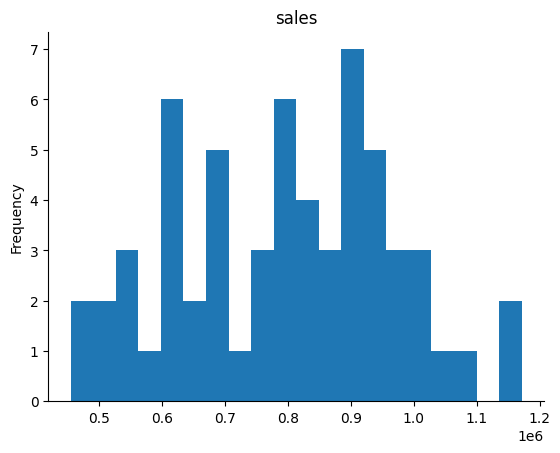

In [ ]:
# @title sales

from matplotlib import pyplot as plt
monthly_sales['sales'].plot(kind='hist', bins=20, title='sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

Visualitation

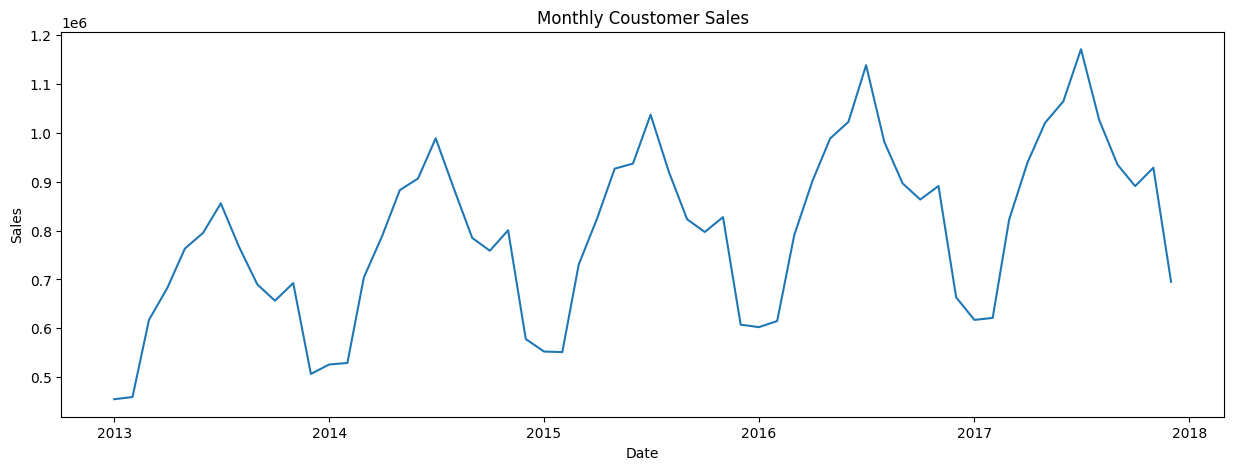

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'],monthly_sales['sales'])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Coustomer Sales")
plt.show()

call the difference on the sales column to make the sales data stationary

In [ ]:
monthly_sales['sales_diff']=monthly_sales['sales'].diff()    #Jan-Feb = 617382 - 459417 = 157965  (colum 1 - 2)
monthly_sales=monthly_sales.dropna()
monthly_sales.head(10)

,date,sales,sales_diff
1,2013-02-01,459417,4513.0
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0
6,2013-07-01,855922,60325.0
7,2013-08-01,766761,-89161.0
8,2013-09-01,689907,-76854.0
9,2013-10-01,656587,-33320.0
10,2013-11-01,692643,36056.0


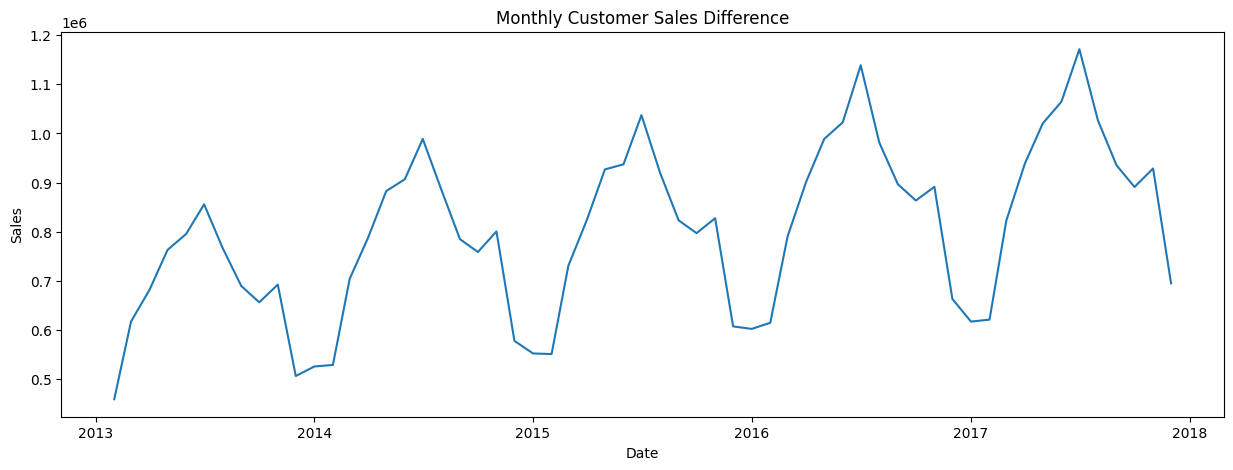

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'],monthly_sales['sales'])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Customer Sales Difference")
plt.show()

Dropping off sales and date

In [ ]:
supervised_data=monthly_sales.drop(['date','sales'],axis=1)  #12 months data taken for supervise purpose

Preparing the supervised data

In [ ]:
for i in range(1,13):
  col_name='month'+str(i)
  supervised_data[col_name]=supervised_data['sales_diff'].shift(i)
supervised_data=supervised_data.dropna().reset_index(drop=True)
supervised_data.head(10)

,sales_diff,month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12
0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0,4513.0
1,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0
2,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0
3,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0
4,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0
5,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0
6,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0
7,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0
8,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0
9,41900.0,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0


split the data into Train and test

In [ ]:
train_data=supervised_data[:-12]            # Previous 12 months
test_data=supervised_data[-12:]             # Comming 12 months
print("Train Data Shape",train_data.shape)
print("Test Data Shape",test_data.shape)

Train Data Shape (35, 13)
Test Data Shape (12, 13)


In [ ]:
scaler=MinMaxScaler(feature_range=(-1,1))
scaler.fit(train_data)
train_data=scaler.transform(train_data)
test_data=scaler.transform(test_data)

In [ ]:
X_train,y_train=train_data[:,1:],train_data[:,0:1]   # column 1, column 0 and 1
X_test,y_test=test_data[:,1:],test_data[:,0:1]
y_train=y_train.ravel()
y_test=y_test.ravel()
print("X_train Shape:",X_train.shape)
print("y_train Shape:",y_train.shape)
print("X_test Shape:",X_test.shape)
print("y_test Shape:",y_test.shape)



X_train Shape: (35, 12)
y_train Shape: (35,)
X_test Shape: (12, 12)
y_test Shape: (12,)


Make prediction data frome to merge the predicted sales price of all trained algorithms

In [ ]:
sales_dates=monthly_sales['date'][-12:].reset_index(drop=True) #
predict_df=pd.DataFrame(sales_dates)


In [ ]:
predict_df


,date
0,2017-01-01
1,2017-02-01
2,2017-03-01
3,2017-04-01
4,2017-05-01
5,2017-06-01
6,2017-07-01
7,2017-08-01
8,2017-09-01
9,2017-10-01


In [ ]:
act_sales=monthly_sales['sales'][-13:].to_list() #These are the sales last 13 months
print(act_sales)

[663411, 617306, 621369, 822667, 938862, 1020686, 1064624, 1171393, 1026403, 935263, 891160, 928837, 695170]


**Forecasting**


To create the linesr regression model and predictd output

In [ ]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
lr_pre=lr_model.predict(X_test)  #Linear methode used for relationship between set of input variables and set of output variables



In [ ]:
lr_pre=lr_pre.reshape(-1,1)
#this is a set matrix -contains the input features ofthe test data and the predicted output
lr_pre_test_set=np.concatenate([lr_pre,X_test],axis=1)
lr_pre_test_set=scaler.inverse_transform(lr_pre_test_set)

In [ ]:
result_list=[]
for index in range(0,len(lr_pre_test_set)):
  result_list.append(lr_pre_test_set[index][0]+act_sales[index])
lr_pre_series=pd.Series(result_list,name="Linear Predicton")
predict_df=predict_df.merge(lr_pre_series,left_index=True,right_index=True)



In [ ]:
print(predict_df)

         date  Linear Predicton
0  2017-01-01      6.479148e+05
1  2017-02-01      6.283374e+05
2  2017-03-01      8.195190e+05
3  2017-04-01      9.436391e+05
4  2017-05-01      1.033653e+06
5  2017-06-01      1.065286e+06
6  2017-07-01      1.201561e+06
7  2017-08-01      1.002123e+06
8  2017-09-01      9.415142e+05
9  2017-10-01      9.080646e+05
10 2017-11-01      9.167461e+05
11 2017-12-01      6.947978e+05


In [ ]:
lr_mse=np.sqrt(mean_squared_error(predict_df['monthly_sales'],monthly_sales['sales'][-12:]))   #mse=Mean Square Error
lr_mae=mean_absolute_error(predict_df['Linear Predicton'],monthly_sales['sales'][-12:])            #mae=Mean Absolute Error
lr_r2=r2_score(predict_df['Linear Predicton'],monthly_sales['sales'][-12:])
print("Linear Regression MSE:",lr_mse)
print("Linear Regression MAE:",lr_mae)
print("Linear Regression R2:",lr_r2)

Linear Regression MSE: 16221.272385416869
Linear Regression MAE: 12433.184266490736
Linear Regression R2: 0.9906152516380969


Visualization of the prediction against the actual sales

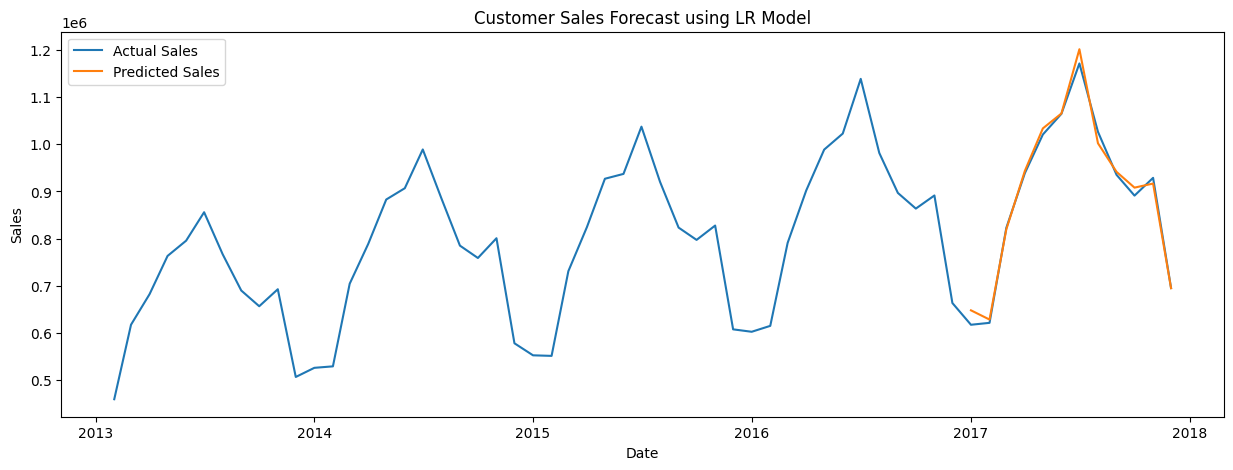

In [ ]:
plt.figure(figsize=(15,5))
#Actual Sales
plt.plot(monthly_sales['date'],monthly_sales['sales'])
#Predicted Sales
plt.plot(predict_df['date'],predict_df['Linear Predicton'])
plt.title("Customer Sales Forecast using LR Model")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(['Actual Sales','Predicted Sales'])
plt.show()
